## Final Project Submission

Please fill out:
* Student name: Erick Kibugi, Hilda Jerotich, David Muriithi, Alice Muia, Emmanuel Kipleting, Boniface Njeri, Bernice Nyawira  
* Student pace: part time 
* Scheduled project review date/time: 
* Instructor name: George Kamundia
* Blog post URL:


## Introduction
Golden Arc Pictures is preparing to launch a new movie studio with the goal of producing original video content. However, the company currently lacks experience in film production. This analysis will explore various datasets related to the movie industry to uncover trends, patterns, and audience preferences. The insights gained will be translated into actionable recommendations that the head of Golden Arc Pictures’s new studio can use to make informed decisions about the types of films to develop.

In [1]:
#importing the required libraries
import pandas as pd
import numpy as np
import gzip
import sqlite3
import seaborn as sns


## Data loading, extraction and analysis

For the first dataset, we are dealing with tmdd.movies.csv.gz 

In [2]:
df_tmdb_mov = pd.read_csv('tmdb.movies.csv')
df_tmdb_mov.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [3]:
# with the following lines of code, we aim to investigate the dataset and understand its structure, size, and data types.
df_tmdb_mov.info()
df_tmdb_mov.shape
df_tmdb_mov.duplicated().sum()
df_tmdb_mov.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

As a result, we have observed there are no duplicates, no null values and date format is YYYY-MM-DD.

In [4]:
# We will now check the number of movies available in each language.
count_by_language = df_tmdb_mov['original_language'].value_counts()
print(count_by_language)

en    23291
fr      507
es      455
ru      298
ja      265
      ...  
kk        1
hz        1
cr        1
sl        1
ps        1
Name: original_language, Length: 76, dtype: int64


## Data visualization

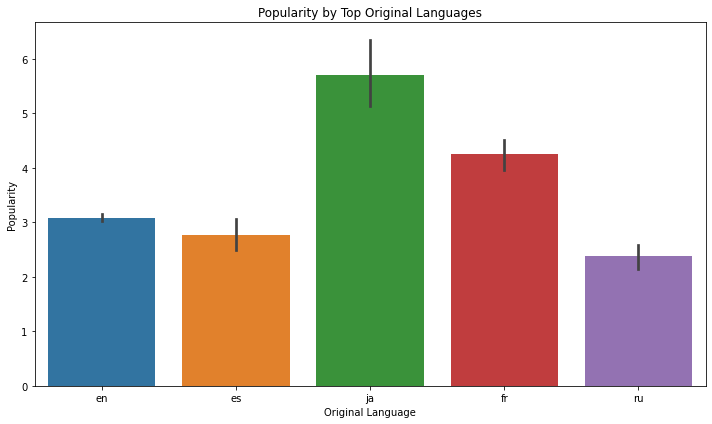

In [5]:
# the following is a simple bar plot to visualize the count of movies by original language
import matplotlib.pyplot as plt
top_languages = df_tmdb_mov['original_language'].value_counts().nlargest(5).index
filtered_df = df_tmdb_mov[df_tmdb_mov['original_language'].isin(top_languages)]

plt.figure(figsize=(10, 6))
sns.barplot(data=filtered_df, x='original_language', y='popularity')
plt.title('Popularity by Top Original Languages')
plt.xlabel('Original Language')
plt.ylabel('Popularity')
plt.tight_layout()
plt.show()

Inference: Japanese is obsereved to have a higher popularity despite having less movie counts compares to a language like English that is the most common.  

### Checking for normality


Language: en


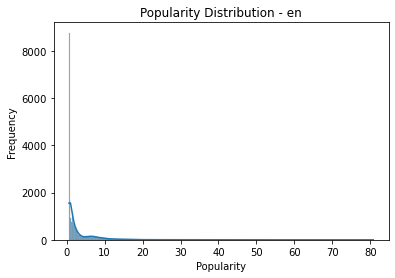


Language: fr


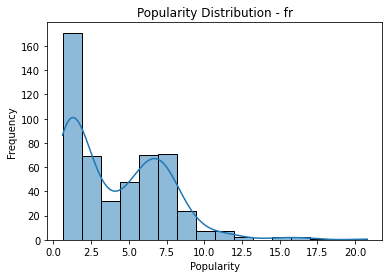


Language: es


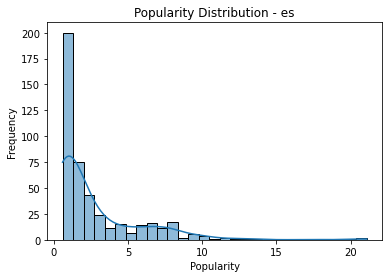


Language: ru


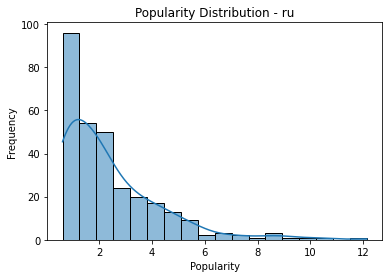


Language: ja


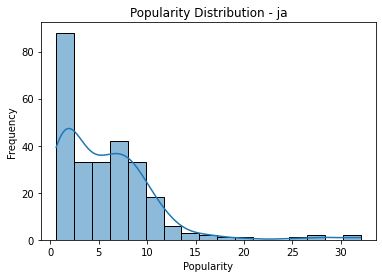

In [6]:
top_languages = df_tmdb_mov['original_language'].value_counts().nlargest(5).index

for lang in top_languages:
    lang_data = df_tmdb_mov[df_tmdb_mov['original_language'] == lang]['popularity']
    
    print(f'\nLanguage: {lang}')

    # Histogram
    sns.histplot(lang_data, kde=True)
    plt.title(f'Popularity Distribution - {lang}')
    plt.xlabel('Popularity')
    plt.ylabel('Frequency')
    plt.show()

###  Hypothesis testing

In [7]:
# Group popularity by language
groups = [filtered_df[filtered_df['original_language'] == lang]['popularity'] for lang in top_languages]

from scipy.stats import f_oneway
# Perform one-way ANOVA
f_stat, p_val = f_oneway(*groups)

print(f"ANOVA test: F-statistic = {f_stat:.3f}, p-value = {p_val:.4f}")

ANOVA test: F-statistic = 34.246, p-value = 0.0000


There is a significant difference in average popularity among languages since p<0.05

## The second dataset

The second dataset under investigation is 'tn.movie_budgets.csv'.

### Data loading, extraction, cleaning and analysis

In [8]:
df_tmdb_mov_bud = pd.read_csv('tn.movie_budgets.csv')
df_tmdb_mov_bud.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,revenue,profit,roi,release_year,release_month
0,1,1959-07-18,The Nun's Story,3500000,12800000,12800000,25600000,22100000,6.314286,1959,7
1,1,1962-06-13,Lolita,2000000,9250000,9250000,18500000,16500000,8.250000,1962,6
2,1,1974-02-07,Blazing Saddles,2600000,119500000,119500000,239000000,236400000,90.923077,1974,2
3,1,1978-06-16,Jaws 2,20000000,102922376,208900376,311822752,291822752,14.591138,1978,6
4,1,1980-11-14,Raging Bull,18000000,23380203,23380203,46760406,28760406,1.597800,1980,11


In [9]:
cols = ['production_budget', 'domestic_gross', 'worldwide_gross']
for col in cols:
    # Remove non-numeric characters
    df_tmdb_mov_bud[col] = df_tmdb_mov_bud[col].replace('[\$,]', '', regex=True)
    # Convert to numeric, set errors='coerce' to handle bad data
    df_tmdb_mov_bud[col] = pd.to_numeric(df_tmdb_mov_bud[col], errors='coerce')

In [10]:
cols = ['production_budget', 'domestic_gross', 'worldwide_gross']
for col in cols:
    df_tmdb_mov_bud[col] = df_tmdb_mov_bud[col].replace('[\$,]', '', regex=True).astype(int)

In [11]:
## Remove rows where 'budget' values are missing or zero
df_tmdb_mov_bud = df_tmdb_mov_bud.dropna(subset=['domestic_gross','worldwide_gross', 'production_budget'])
df_tmdb_mov_bud = df_tmdb_mov_bud[
    (df_tmdb_mov_bud['domestic_gross'] != 0) &
    (df_tmdb_mov_bud['worldwide_gross'] != 0) &
    (df_tmdb_mov_bud['production_budget'] != 0)
]

In [12]:
# create a new column 'revenue' as the sum of 'domestic_gross' and 'worldwide_gross'
df_tmdb_mov_bud['revenue'] = df_tmdb_mov_bud['domestic_gross'] + df_tmdb_mov_bud['worldwide_gross']

In [13]:
# create a new column 'revenue' as the sum of 'domestic_gross' and 'worldwide_gross'
df_tmdb_mov_bud['revenue'] = df_tmdb_mov_bud['domestic_gross'] + df_tmdb_mov_bud['worldwide_gross']

In [14]:
# create ROI = (revenue - production_budget) / production_budget
df_tmdb_mov_bud['roi'] = (df_tmdb_mov_bud['revenue'] - df_tmdb_mov_bud['production_budget']) / df_tmdb_mov_bud['production_budget']

# Convert 'release_date' to datetime
df_tmdb_mov_bud['release_date'] = pd.to_datetime(df_tmdb_mov_bud['release_date'], errors='coerce')

# Extract year and month into new columns
df_tmdb_mov_bud['release_year'] = df_tmdb_mov_bud['release_date'].dt.year
df_tmdb_mov_bud['release_month'] = df_tmdb_mov_bud['release_date'].dt.month

In [15]:
df_tmdb_mov_bud.info()
df_tmdb_mov_bud.shape
df_tmdb_mov_bud.duplicated().sum()
df_tmdb_mov_bud.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5234 entries, 0 to 5233
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5234 non-null   int64  
 1   release_date       5234 non-null   object 
 2   movie              5234 non-null   object 
 3   production_budget  5234 non-null   int32  
 4   domestic_gross     5234 non-null   int32  
 5   worldwide_gross    5234 non-null   int32  
 6   revenue            5234 non-null   int32  
 7   profit             5234 non-null   int64  
 8   roi                5234 non-null   float64
 9   release_year       5234 non-null   int64  
 10  release_month      5234 non-null   int64  
dtypes: float64(1), int32(4), int64(4), object(2)
memory usage: 408.9+ KB


id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
revenue              0
profit               0
roi                  0
release_year         0
release_month        0
dtype: int64

In [16]:
df_tmdb_mov_bud_sorted = df_tmdb_mov_bud.sort_values(
    by=['id','release_date','production_budget', 'domestic_gross', 'worldwide_gross','release_year','release_month', 'revenue', 'profit', 'roi'],
    ascending=True)
df_tmdb_mov_bud_sorted.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,revenue,profit,roi,release_year,release_month
0,1,1959-07-18,The Nun's Story,3500000,12800000,12800000,25600000,22100000,6.314286,1959,7
1,1,1962-06-13,Lolita,2000000,9250000,9250000,18500000,16500000,8.250000,1962,6
2,1,1974-02-07,Blazing Saddles,2600000,119500000,119500000,239000000,236400000,90.923077,1974,2
3,1,1978-06-16,Jaws 2,20000000,102922376,208900376,311822752,291822752,14.591138,1978,6
4,1,1980-11-14,Raging Bull,18000000,23380203,23380203,46760406,28760406,1.597800,1980,11


In [17]:
df_tmdb_mov_bud['production_budget'].max()

425000000

In [18]:
#Saving df_tmdb_mov_bud_sorted as a csv file
df_tmdb_mov_bud_sorted.to_csv('tn.movie_budgets.csv', index= False)

### Data visualization

In [19]:
# Create labeled budget range column
bin_edges = [0, 10_000_000, 50_000_000, 100_000_000, 200_000_000, 300_000_000, 425_000_000]
bin_labels = ['0–10M', '10M–50M', '50M–100M', '100M–200M', '200M–300M', '300M–425M']
df_tmdb_mov_bud['budget_range'] = pd.cut(df_tmdb_mov_bud['production_budget'], bins=bin_edges, labels=bin_labels, include_lowest=True)

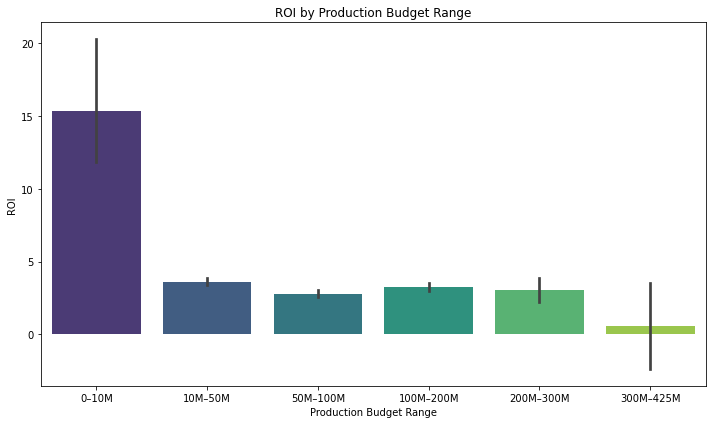

In [20]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_tmdb_mov_bud, x='budget_range', y='roi', palette='viridis')

plt.title('ROI by Production Budget Range')
plt.xlabel('Production Budget Range')
plt.ylabel('ROI')
plt.xticks(rotation=0, fontsize=10)  # Keep horizontal and readable
plt.tight_layout()
plt.show()

The lower budgeted movies have the highest return on interest compared to the highest budgeted movies which have lowest return on interest.

### Hypothesis testing

In [21]:
# Group ROI by range
groups = [group['roi'] for _, group in df_tmdb_mov_bud.groupby('budget_range')]

# ANOVA
f_stat, p_val = f_oneway(*groups)
print(f"ANOVA: F = {f_stat:.3f}, p = {p_val:.4f}")

ANOVA: F = 10.263, p = 0.0000


There is a statistical significance in ROI across budget ranges since p<0.05

## The third dataset

The third dataset under investigation is 'bom.movie_gross.csv'.

### Data loading, extraction, cleaning and analysis

In [22]:
df_tmdb_mov_gross = pd.read_csv('bom.movie_gross.csv')
df_tmdb_mov_gross

,title,studio,domestic_gross,foreign_gross,year,revenue
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08
...,...,...,...,...,...,...
2002,I Still See You,LGF,1400.0,1500000.0,2018,1.501400e+06
2003,The Catcher Was a Spy,IFC,725000.0,229000.0,2018,9.540000e+05
2004,Time Freak,Grindstone,10000.0,256000.0,2018,2.660000e+05
2005,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200.0,2018,9.840000e+04


In [23]:
cols = ['domestic_gross', 'foreign_gross']
for col in cols:
    # Remove non-numeric characters
    df_tmdb_mov_gross[col] = df_tmdb_mov_gross[col].replace('[\$,]', '', regex=True)
    # Convert to numeric, set errors='coerce' to handle bad data
    df_tmdb_mov_gross[col] = pd.to_numeric(df_tmdb_mov_gross[col], errors='coerce')

In [24]:
## Remove rows where 'revenue' or 'budget' are missing or zero
df_tmdb_mov_gross = df_tmdb_mov_gross.dropna(subset=['domestic_gross','foreign_gross'])
df_tmdb_mov_gross = df_tmdb_mov_gross[
    (df_tmdb_mov_gross['domestic_gross'] != 0) &
    (df_tmdb_mov_gross['foreign_gross'] != 0)
]

In [25]:
# creating the 'revenue' column by summing 'domestic_gross' and 'foreign_gross'
df_tmdb_mov_gross['revenue'] = df_tmdb_mov_gross['domestic_gross'] + df_tmdb_mov_gross['foreign_gross']

In [26]:
df_tmdb_mov_gross.info()
df_tmdb_mov_gross.shape
df_tmdb_mov_gross.duplicated().sum()
df_tmdb_mov_gross.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2007 entries, 0 to 2006
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2007 non-null   object 
 1   studio          2007 non-null   object 
 2   domestic_gross  2007 non-null   float64
 3   foreign_gross   2007 non-null   float64
 4   year            2007 non-null   int64  
 5   revenue         2007 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 109.8+ KB


title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
revenue           0
dtype: int64

In [27]:
#Dropping rows with missing 'studio' values
df_tmdb_mov_gross = df_tmdb_mov_gross.dropna(subset=['studio'])

In [28]:
df_tmdb_mov_gross.shape
df_tmdb_mov_gross.isnull().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
revenue           0
dtype: int64

In [29]:
df_tmdb_mov_gross.head()

,title,studio,domestic_gross,foreign_gross,year,revenue
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08


In [30]:
df_tmdb_mov_gross.to_csv('bom.movie_gross.csv', index=False)

### Data visualization

In [31]:
#Filtering to get the top studios
top_studios = df_tmdb_mov_gross['studio'].value_counts().head(5).index
df_filtered = df_tmdb_mov_gross[df_tmdb_mov_gross['studio'].isin(top_studios)].dropna(subset=['revenue'])

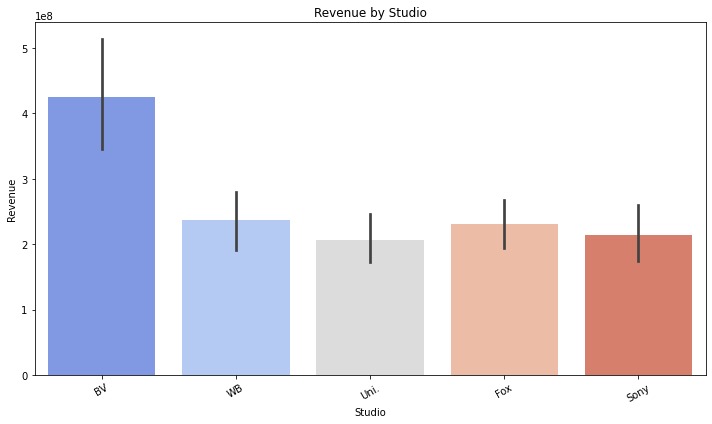

In [32]:
#Plotting a barplot
plt.figure(figsize=(10, 6))
sns.barplot(data=df_filtered, x='studio', y='revenue', palette='coolwarm')
plt.title('Revenue by Studio')
plt.xlabel('Studio')
plt.ylabel('Revenue')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

The BV studio has the highest revenue while the UNI studio has the lowest revenue.

### Checking for normality

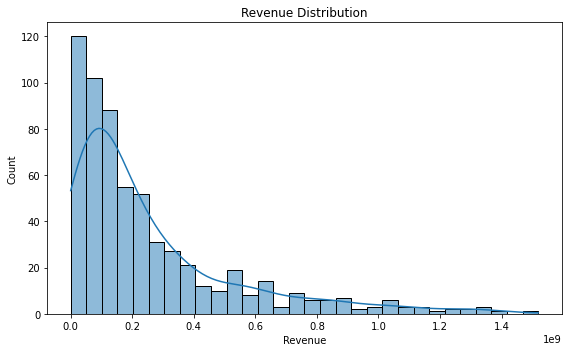

In [33]:
plt.figure(figsize=(8, 5))
sns.histplot(df_filtered['revenue'], kde=True, bins=30)
plt.title('Revenue Distribution')
plt.xlabel('Revenue')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

### Hypothesis testing

In [34]:
# Group revenue values by studio
groups = [group['revenue'] for _, group in df_filtered.groupby('studio')]

# Perform ANOVA
f_stat, p_val = f_oneway(*groups)
print(f"ANOVA: F = {f_stat:.3f}, p = {p_val:.4f}")

ANOVA: F = 12.439, p = 0.0000


At least 1 studio has significantly different average revenue, since p<0.05

## The fourth dataset

The fourth dataset under investigation  is 'rt.movie_info.tsv'

In [35]:
# Load the data 
df_rt_mov = pd.read_csv('rt.movie_info.tsv', sep='\t')
df_rt_mov.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [36]:
# Remove missing or malformed data
df_rt_mov = df_rt_mov.dropna(subset=['box_office'])

# Convert box_office to numeric (remove $, commas)
df_rt_mov['box_office'] = df_rt_mov['box_office'].replace('[\$,]', '', regex=True).astype(float)

In [37]:
# Handle multiple genres per movie
df_rt_mov['genre'] = df_rt_mov['genre'].str.split(', ')
df_rt_mov_exploded =df_rt_mov.explode('genre')

In [38]:
df_rt_mov['genre_tuple'] = df_rt_mov['genre'].apply(lambda x: tuple(x) if isinstance(x, list) else x)
df_rt_mov.drop_duplicates(subset=['genre_tuple'], inplace=True)

In [39]:
df_rt_mov_exploded = df_rt_mov.explode('genre')


In [40]:
df_rt_mov.info()
df_rt_mov.shape
df_rt_mov.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 1 to 1518
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            100 non-null    int64  
 1   synopsis      100 non-null    object 
 2   rating        100 non-null    object 
 3   genre         100 non-null    object 
 4   director      88 non-null     object 
 5   writer        73 non-null     object 
 6   theater_date  98 non-null     object 
 7   dvd_date      98 non-null     object 
 8   currency      100 non-null    object 
 9   box_office    100 non-null    float64
 10  runtime       100 non-null    object 
 11  studio        89 non-null     object 
 12  genre_tuple   100 non-null    object 
dtypes: float64(1), int64(1), object(11)
memory usage: 10.9+ KB


id               0
synopsis         0
rating           0
genre            0
director        12
writer          27
theater_date     2
dvd_date         2
currency         0
box_office       0
runtime          0
studio          11
genre_tuple      0
dtype: int64

In [41]:
df_rt_mov = df_rt_mov.dropna(subset=['director', 'studio', 'theater_date', 'dvd_date', 'writer'])

In [42]:
df_rt_mov.isnull().sum()
df_rt_mov.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65 entries, 1 to 1518
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            65 non-null     int64  
 1   synopsis      65 non-null     object 
 2   rating        65 non-null     object 
 3   genre         65 non-null     object 
 4   director      65 non-null     object 
 5   writer        65 non-null     object 
 6   theater_date  65 non-null     object 
 7   dvd_date      65 non-null     object 
 8   currency      65 non-null     object 
 9   box_office    65 non-null     float64
 10  runtime       65 non-null     object 
 11  studio        65 non-null     object 
 12  genre_tuple   65 non-null     object 
dtypes: float64(1), int64(1), object(11)
memory usage: 7.1+ KB


In [43]:
df_rt_mov['runtime'] = df_rt_mov['runtime'].str.extract(r'(\d+)').astype(int)

### Data visualization

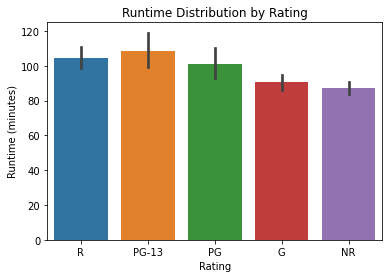

In [44]:
#Plotting a bar plot
sns.barplot(x='rating', y='runtime', data=df_rt_mov)
plt.title('Runtime Distribution by Rating')
plt.xlabel('Rating')
plt.ylabel('Runtime (minutes)')
plt.show()

~ NR- No Rating
~ G- General audiences
PG- Parental Guidance
PG-13 - Parents strongly cautioned (some material inappropriate for under 13)
R- Restricted (18+)

### Checking for normality

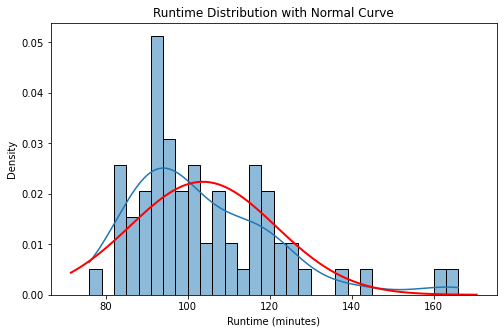

In [45]:
from scipy import stats
plt.figure(figsize=(8,5))
sns.histplot(df_rt_mov['runtime'], kde=True, stat="density", bins=30)
mu, std = df_rt_mov['runtime'].mean(), df_rt_mov['runtime'].std()
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'r', linewidth=2)
plt.title('Runtime Distribution with Normal Curve')
plt.xlabel('Runtime (minutes)')
plt.show()

### Hypothesis testing

In [46]:
# Group revenue values by studio
groups = [group['runtime'] for _, group in df_rt_mov.groupby('rating')]

# Perform ANOVA
f_stat, p_val = f_oneway(*groups)
print(f"ANOVA: F = {f_stat:.3f}, p = {p_val:.4f}")

ANOVA: F = 1.102, p = 0.3641


Since p>0.05, we fail to reject the null hyppothesis, the medians are equal
We lack enough statistical evidence that the medians differe across the different runtimes.

In [47]:
#Saving to csv
df_rt_mov.to_csv('rt_mov_sorted.csv', index=False)